## Sioux Fall Network for Tranpsortaiton Network Analysis
Data obtained from: https://github.com/bstabler/TransportationNetworks

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:,.2f}".format ##for displaying only 2 decimal points

Create network, flow, and node dataframes:

In [2]:
net= pd.read_csv('data/SiouxFalls_net.tntp', skiprows=8, sep='\t').drop(['~', ';'], axis =1)
net['edge']=net.index+1
flow=pd.read_csv('data/SiouxFalls_flow.tntp',sep='\t').drop(['From ', 'To '],axis=1)
flow.rename(columns={"Volume ": "flow", "Cost ": "cost"},inplace=True)
node_coord=pd.read_csv('data/SiouxFalls_node.tntp',sep='\t').drop([';'], axis=1) # Actual Sioux Falls coordinate
node_xy=pd.read_csv('data/SiouxFalls_node_xy.tntp',sep='\t') # X,Y position for good visualization

In [3]:
# dataframe containing all link attributes
sioux_falls_df=pd.concat([net,flow], axis=1)
sioux_falls_df

,init_node,term_node,capacity,length,free_flow_time,b,power,speed,toll,link_type,edge,flow,cost
0,1,2,"25,900.20",6,6,0.15,4,0,0,1,1,"4,494.66",6.00
1,1,3,"23,403.47",4,4,0.15,4,0,0,1,2,"8,119.08",4.01
2,2,1,"25,900.20",6,6,0.15,4,0,0,1,3,"4,519.08",6.00
3,2,6,"4,958.18",5,5,0.15,4,0,0,1,4,"5,967.34",6.57
4,3,1,"23,403.47",4,4,0.15,4,0,0,1,5,"8,094.66",4.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,23,22,"5,000.00",4,4,0.15,4,0,0,1,72,"9,626.21",12.24
72,23,24,"5,078.51",2,2,0.15,4,0,0,1,73,"7,902.98",3.76
73,24,13,"5,091.26",4,4,0.15,4,0,0,1,74,"11,112.39",17.62
74,24,21,"4,885.36",3,3,0.15,4,0,0,1,75,"10,259.52",11.75


#### Create Sioux Falls Network

Create a multi directional graph from the dataframe:

In [4]:
G = nx.from_pandas_edgelist(sioux_falls_df, 'init_node', 'term_node', 
    ['capacity','length','free_flow_time','b','power','speed','toll','link_type','edge','flow','cost'],create_using=nx.MultiDiGraph())

Create node attributes:

In [5]:
#coordinate position
pos_coord=dict([(i,(a,b)) for i, a,b in zip(node_coord.Node, node_coord.X,node_coord.Y)])

In [6]:
#for better looking graph
pos_xy=dict([(i,(a,b)) for i, a,b in zip(node_xy.Node, node_xy.X,node_xy.Y)])

In [7]:
for n, p in pos_coord.items():
    G.nodes[n]['pos_coord'] = p
    
for n, p in pos_xy.items():
    G.nodes[n]['pos_xy'] = p

 Create  node atttibutes followin this article:
 
 Ng, M., Park, J. and Waller, S.T., 2010. A hybrid bilevel model for the optimal shelter assignment in emergency evacuations. Computer‐Aided Civil and Infrastructure Engineering, 25(8), pp.547-556.

In [8]:
origin =[14,15,22,23]
destination=[4,5,6,8,9,10,11,16,17,18]


In [9]:
origin =[14,15,22,23]

destination=[4,5,6,8,9,10,11,16,17,18]

for n in G.nodes:
    if n in destination:
        G.nodes[n]['O/D']='destination'
        G.nodes[n]['color']='green'
    elif n in origin:
        G.nodes[n]['O/D']='origin'
        G.nodes[n]['color']='red'
    else:
        G.nodes[n]['O/D']='transfer_node'
        G.nodes[n]['color']='blue'


Add demand and supply at origin and destination nodes:

In [10]:
demand=[2000,9000,7000,2000]
capacity=[5000,4000,6000,5000,4000,4000,4000,4000,1000,5000]
node_demand=dict([(i,a) for i, a in zip( origin,demand)])
node_capacity=dict([(i,a) for i, a in zip( destination,capacity)])
for n, p in node_demand.items():
    G.nodes[n]['demand'] = p
for n, p in node_capacity.items():
    G.nodes[n]['capacity'] = p

## Visualization

##### Sioux Falls with actual coordinates showing the actual relative positions of nodes:

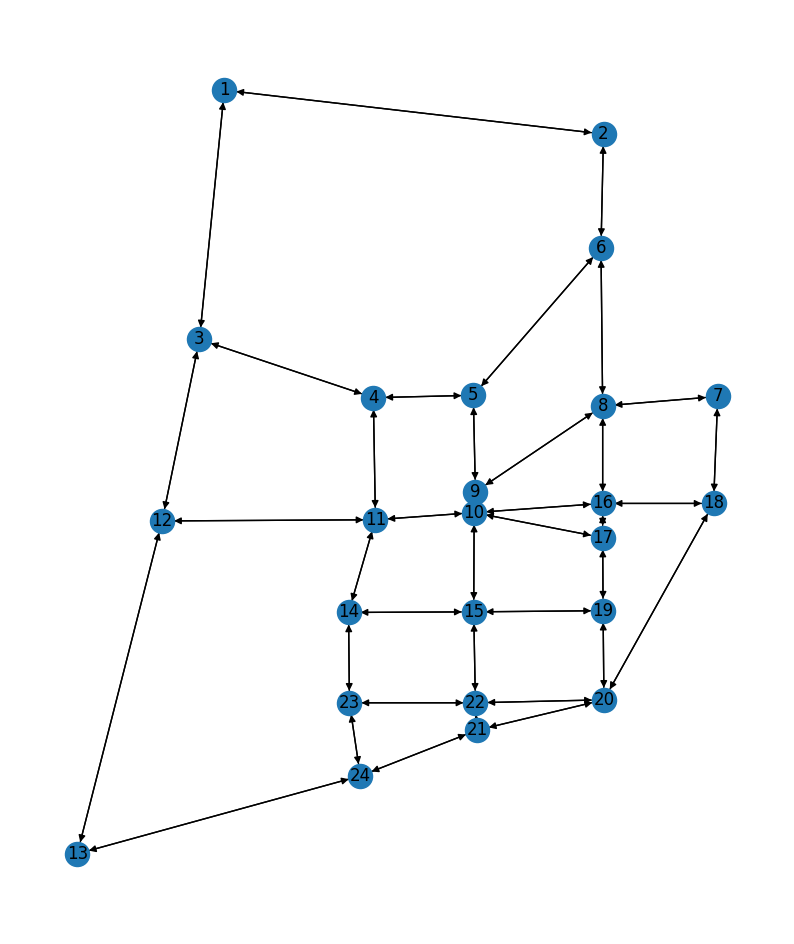

In [11]:
ax,fig=plt.subplots(figsize=(10,12))
nx.draw(G, pos_coord,with_labels = True)

#### A better looking graph  with origin and destination showing in different colors:

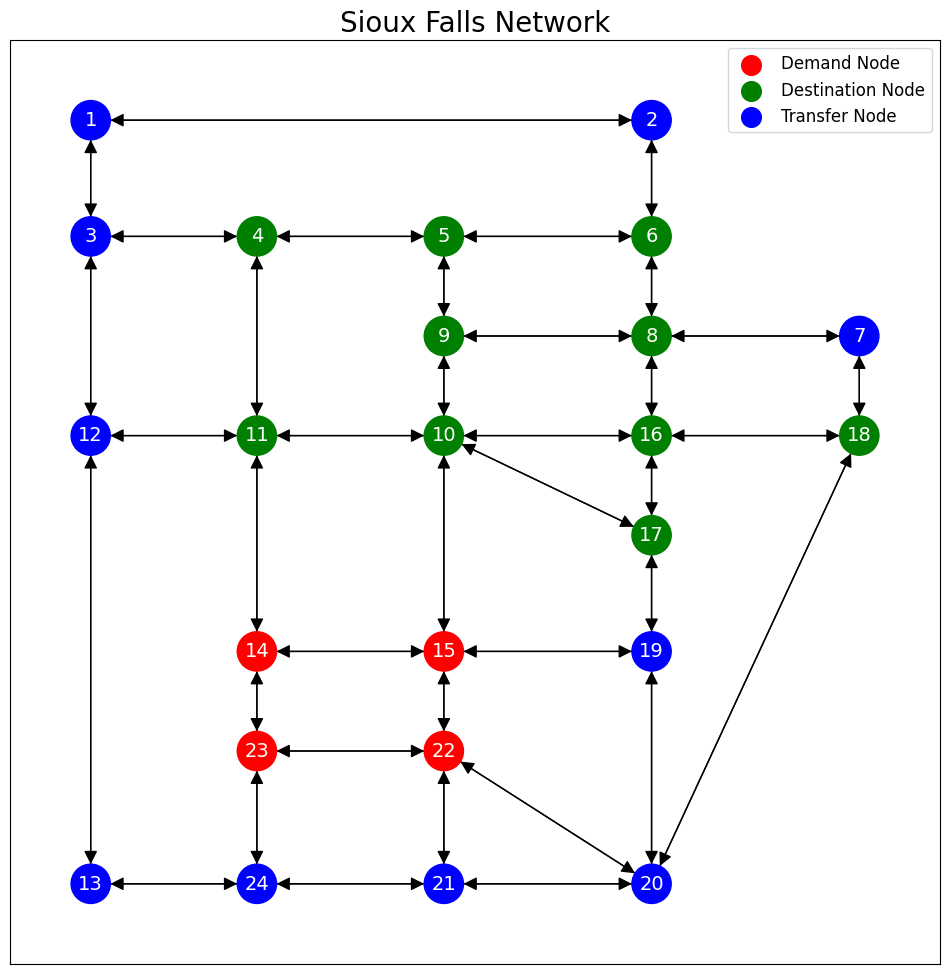

In [12]:
colors=[n[1]['color'] for n in G.nodes.data()]      
ax,fig=plt.subplots(figsize=(12,12))
nx.draw_networkx(G,pos=pos_xy,with_labels=True,node_color=colors,arrows=True,arrowsize=20,node_size=800,font_color='white',font_size=14)

color_node_type= {'red':'Demand Node', 'green': 'Destination Node','blue':'Transfer Node'}
for c,n in color_node_type.items():
    fig.scatter([],[], c=c, label=n,s=200)
    fig.legend(loc='upper right',fontsize=12)

fig.set_title('Sioux Falls Network', fontsize=20)
plt.savefig('siux-falls-network.png')

Lets create a same visulization with actual coordinates and save it:

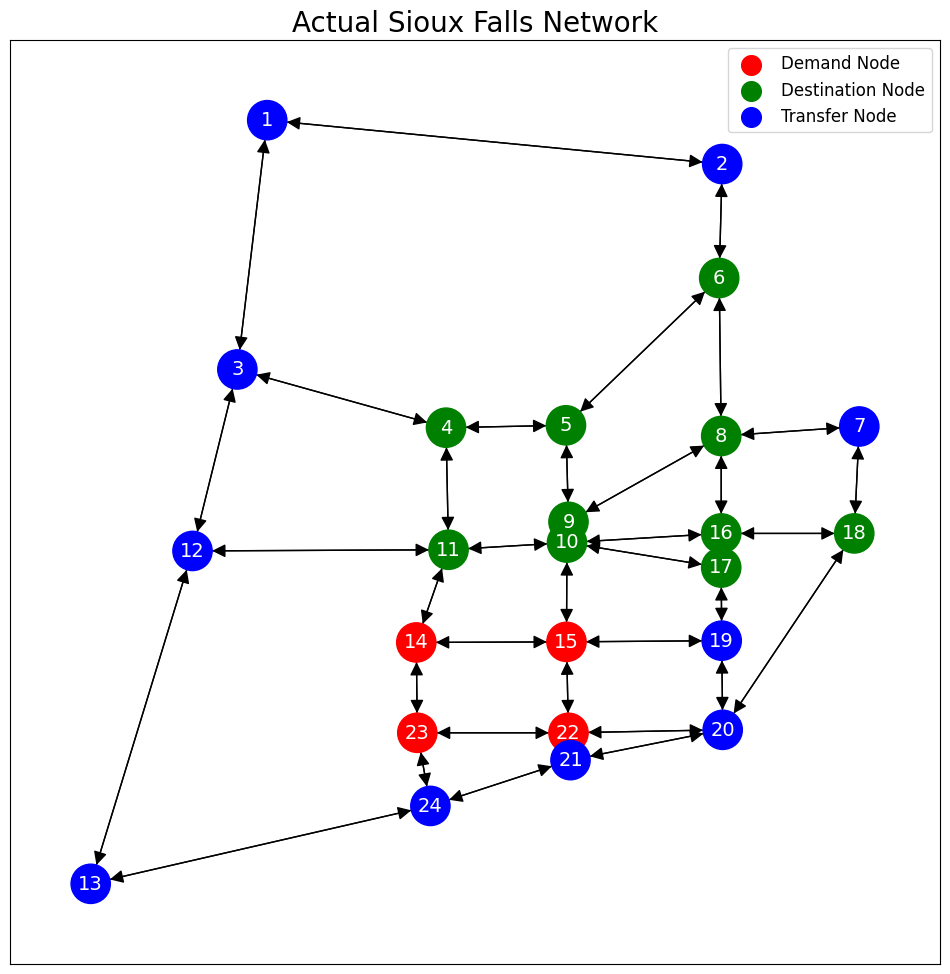

In [13]:
colors=[n[1]['color'] for n in G.nodes.data()]      
ax,fig=plt.subplots(figsize=(12,12))
nx.draw_networkx(G,pos=pos_coord,with_labels=True,node_color=colors,arrows=True,arrowsize=20,node_size=800,font_color='white',font_size=14)

color_node_type= {'red':'Demand Node', 'green': 'Destination Node','blue':'Transfer Node'}
for c,n in color_node_type.items():
    fig.scatter([],[], c=c, label=n,s=200)
    fig.legend(loc='upper right',fontsize=12)

fig.set_title('Actual Sioux Falls Network', fontsize=20)
plt.savefig('actual-siux-falls-network.png')

### Node and Link Attributes:

In [14]:
# Checkout node atttibutes
[*G.nodes.data()]

[(1,
  {'pos_coord': (-96.77041974, 43.61282792),
   'pos_xy': (50000, 510000),
   'O/D': 'transfer_node',
   'color': 'blue'}),
 (2,
  {'pos_coord': (-96.71125063, 43.60581298),
   'pos_xy': (320000, 510000),
   'O/D': 'transfer_node',
   'color': 'blue'}),
 (3,
  {'pos_coord': (-96.77430341, 43.5729616),
   'pos_xy': (50000, 440000),
   'O/D': 'transfer_node',
   'color': 'blue'}),
 (6,
  {'pos_coord': (-96.71164389, 43.58758553),
   'pos_xy': (320000, 440000),
   'O/D': 'destination',
   'color': 'green',
   'capacity': 6000}),
 (4,
  {'pos_coord': (-96.74716843, 43.56365362),
   'pos_xy': (130000, 440000),
   'O/D': 'destination',
   'color': 'green',
   'capacity': 5000}),
 (12,
  {'pos_coord': (-96.78013678, 43.54394065),
   'pos_xy': (50000, 320000),
   'O/D': 'transfer_node',
   'color': 'blue'}),
 (5,
  {'pos_coord': (-96.73156909, 43.56403357),
   'pos_xy': (220000, 440000),
   'O/D': 'destination',
   'color': 'green',
   'capacity': 4000}),
 (11,
  {'pos_coord': (-96.746840

In [15]:
# Checkout link atttibutes
[*G.edges.data()]

[(1,
  2,
  {'capacity': 25900.20064,
   'length': 6,
   'free_flow_time': 6,
   'b': 0.15,
   'power': 4,
   'speed': 0,
   'toll': 0,
   'link_type': 1,
   'edge': 1,
   'flow': 4494.6576464564205,
   'cost': 6.00081623735432}),
 (1,
  3,
  {'capacity': 23403.47319,
   'length': 4,
   'free_flow_time': 4,
   'b': 0.15,
   'power': 4,
   'speed': 0,
   'toll': 0,
   'link_type': 1,
   'edge': 2,
   'flow': 8119.079948047809,
   'cost': 4.008690750207941}),
 (2,
  1,
  {'capacity': 25900.20064,
   'length': 6,
   'free_flow_time': 6,
   'b': 0.15,
   'power': 4,
   'speed': 0,
   'toll': 0,
   'link_type': 1,
   'edge': 3,
   'flow': 4519.079948047809,
   'cost': 6.000834122995382}),
 (2,
  6,
  {'capacity': 4958.180928,
   'length': 5,
   'free_flow_time': 5,
   'b': 0.15,
   'power': 4,
   'speed': 0,
   'toll': 0,
   'link_type': 1,
   'edge': 4,
   'flow': 5967.336396171377,
   'cost': 6.573598255386801}),
 (3,
  1,
  {'capacity': 23403.47319,
   'length': 4,
   'free_flow_time': 4

#### Shortest path betwen origin and destination usign A* algorighm

In [16]:
origin =[14,15,22,23]
destination=[4,5,6,8,9,10,11,16,17,18]
od=[(o,d) for o in origin for d in destination]

In [17]:
sp={}
sp_cost={}
for i in od:
    sp[i]=nx.astar_path(G,i[0],i[1],weight='cost')
    sp_cost[i]=nx.astar_path_length(G,i[0],i[1],weight='cost')

In [18]:
df=pd.DataFrame.from_dict(sp_cost, orient='index',columns=['sp_cost'])
df['sp']=df.index.map(sp)

In [19]:
df.head()

,sp_cost,sp
"(14, 4)",21.07,"[14, 11, 4]"
"(14, 5)",23.38,"[14, 11, 4, 5]"
"(14, 6)",33.38,"[14, 11, 4, 5, 6]"
"(14, 8)",37.90,"[14, 15, 19, 20, 18, 7, 8]"
"(14, 9)",31.76,"[14, 11, 10, 9]"


In [20]:
df[['origin','destination']]=pd.DataFrame(df.index.tolist(),index=df.index)
df.head()

,sp_cost,sp,origin,destination
"(14, 4)",21.07,"[14, 11, 4]",14,4
"(14, 5)",23.38,"[14, 11, 4, 5]",14,5
"(14, 6)",33.38,"[14, 11, 4, 5, 6]",14,6
"(14, 8)",37.90,"[14, 15, 19, 20, 18, 7, 8]",14,8
"(14, 9)",31.76,"[14, 11, 10, 9]",14,9


In [21]:
df.reset_index(inplace=True)
del df['index']

In [22]:
df.head()

,sp_cost,sp,origin,destination
0,21.07,"[14, 11, 4]",14,4
1,23.38,"[14, 11, 4, 5]",14,5
2,33.38,"[14, 11, 4, 5, 6]",14,6
3,37.90,"[14, 15, 19, 20, 18, 7, 8]",14,8
4,31.76,"[14, 11, 10, 9]",14,9


In [23]:
df = df.reindex(columns=['origin','destination','sp','sp_cost'])

In [24]:
df.head()

,origin,destination,sp,sp_cost
0,14,4,"[14, 11, 4]",21.07
1,14,5,"[14, 11, 4, 5]",23.38
2,14,6,"[14, 11, 4, 5, 6]",33.38
3,14,8,"[14, 15, 19, 20, 18, 7, 8]",37.90
4,14,9,"[14, 11, 10, 9]",31.76


In [25]:
# Export the data as csv to use in optimization software
df.to_csv('shortest_paths.csv',index=False)

Find the lowest cost or the closet facility

In [26]:
closest=df.loc[df.groupby(['origin'])['sp_cost'].idxmin()]
closest

,origin,destination,sp,sp_cost
6,14,11,"[14, 11]",13.84
18,15,17,"[15, 19, 17]",11.74
29,22,18,"[22, 20, 18]",11.97
36,23,11,"[23, 14, 11]",22.91


In [27]:
closest.to_csv('closest_facility.csv',index=False)

Set a tolerence value, $\lambda$ \
We are assuming that people from the demand node will consider traveling if travel distance is $<=$ travel time to closst facility$*$ (1+$\lambda$)


In [28]:
lambda_=0.95
closest['cost_threshold']=closest.sp_cost*(1+lambda_)


In [29]:
closest

,origin,destination,sp,sp_cost,cost_threshold
6,14,11,"[14, 11]",13.84,26.99
18,15,17,"[15, 19, 17]",11.74,22.89
29,22,18,"[22, 20, 18]",11.97,23.35
36,23,11,"[23, 14, 11]",22.91,44.67


In [30]:
cost_threshold=closest.drop(['destination', 'sp','sp_cost'],axis=1)

In [31]:
cost_threshold

,origin,cost_threshold
6,14,26.99
18,15,22.89
29,22,23.35
36,23,44.67


Lets find all facilities that are within the *cost_threshold*

In [32]:
merged=pd.merge(df,cost_threshold)

In [33]:
merged

,origin,destination,sp,sp_cost,cost_threshold
0,14,4,"[14, 11, 4]",21.07,26.99
1,14,5,"[14, 11, 4, 5]",23.38,26.99
2,14,6,"[14, 11, 4, 5, 6]",33.38,26.99
3,14,8,"[14, 15, 19, 20, 18, 7, 8]",37.90,26.99
4,14,9,"[14, 11, 10, 9]",31.76,26.99
5,14,10,"[14, 11, 10]",26.05,26.99
6,14,11,"[14, 11]",13.84,26.99
7,14,16,"[14, 15, 19, 17, 16]",33.45,26.99
8,14,17,"[14, 15, 19, 17]",23.97,26.99
9,14,18,"[14, 15, 19, 20, 18]",30.28,26.99


In [34]:
facilities_threshold=merged[merged['sp_cost']<=merged['cost_threshold']]


In [35]:
facilities_threshold

,origin,destination,sp,sp_cost,cost_threshold
0,14,4,"[14, 11, 4]",21.07,26.99
1,14,5,"[14, 11, 4, 5]",23.38,26.99
5,14,10,"[14, 11, 10]",26.05,26.99
6,14,11,"[14, 11]",13.84,26.99
8,14,17,"[14, 15, 19, 17]",23.97,26.99
14,15,9,"[15, 10, 9]",19.53,22.89
15,15,10,"[15, 10]",13.81,22.89
17,15,16,"[15, 19, 17, 16]",21.21,22.89
18,15,17,"[15, 19, 17]",11.74,22.89
19,15,18,"[15, 19, 20, 18]",18.05,22.89


In [36]:
#Checking if any facilities will be unusued
within_threshold=facilities_threshold.destination.unique().tolist()

In [37]:
set(destination)- set(within_threshold)

set()

We received an empty set meaning none of the destination will be unused.

### Create a Stochastic instances of the demand and capacity

Idea taken from : Santoso, T., Ahmed, S., Goetschalckx, M. and Shapiro, A., 2005. A stochastic programming approach for supply chain network design under uncertainty. European Journal of Operational Research, 167(1), pp.96-115.


-	Use log-normal distribution for the uncertain parameters
-	Log-normal distibtuion are well sited for modeling economic stochastic variables such as demands
-	We use value of the demand and capacity parameters used I the deterministic model as the mean value for the random parameters. 
-	The standard deviation for the distribution were chosen as certain fraction of the mean value

Let's creat 10 instances (scenarios) of demand and capacities with uniform probability.

In [39]:
demand=[2000,9000,7000,2000]
capacity=[5000,4000,6000,5000,4000,4000,4000,4000,1000,5000]

In [40]:
node_demand

{14: 2000, 15: 9000, 22: 7000, 23: 2000}

In [41]:
node_capacity

{4: 5000,
 5: 4000,
 6: 6000,
 8: 5000,
 9: 4000,
 10: 4000,
 11: 4000,
 16: 4000,
 17: 1000,
 18: 5000}

In [115]:
rng = np.random.default_rng(242)
s_demand={}
for key,value in node_demand.items():
    mu=node_demand[key]
    sigma=0.25*node_demand[key]
    normal_std = np.sqrt(np.log(1 + (sigma/mu)**2))
    normal_mean = np.log(mu) - normal_std**2 / 2
   
    print(mu,sigma, ', ',normal_mean, normal_std)
    s_demand[key]= rng.lognormal(normal_mean, normal_std, 10)

2000 500.0 ,  7.5705901486338645 0.24622067706923975
9000 2250.0 ,  9.07466754541014 0.24622067706923975
7000 1750.0 ,  8.823353117129233 0.24622067706923975
2000 500.0 ,  7.5705901486338645 0.24622067706923975


In [108]:
s

{14: array([1319.21374487, 1101.50113516, 2086.40546012, 1450.08929632,
        1045.70779293, 2011.09942012, 2754.6500776 , 2654.53567283,
        2017.33372178, 2443.05371816]),
 15: array([ 6508.04404664,  7230.84578964, 13396.46608042,  8697.97088125,
        10465.14497228,  9574.58061349, 10186.22693031,  9001.26478575,
        10858.9035538 , 10305.26336735]),
 22: array([11711.2343177 ,  9988.8976972 , 13401.03630949,  6836.34645692,
        10678.19399565,  6310.8995215 , 10806.11476451,  4222.56479852,
         7919.43337385,  4827.72994877]),
 23: array([1584.09305987, 1516.21392775, 1847.7731497 , 2410.21989012,
        2267.3160154 , 2182.27049205, 2556.66340625, 1563.88877662,
        2091.14831693, 2680.13502544])}

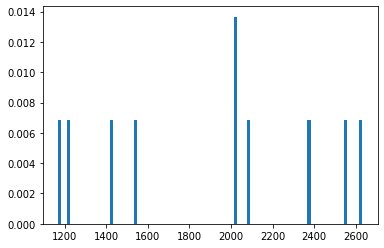

In [116]:
count, bins, ignored = plt.hist(s[14], 100, density=True, align='mid')

In [117]:
rng = np.random.default_rng(242)
s_capacity={}
for key,value in node_capacity.items():
    mu=node_capacity[key]
    sigma=0.25*node_capacity[key]
    normal_std = np.sqrt(np.log(1 + (sigma/mu)**2))
    normal_mean = np.log(mu) - normal_std**2 / 2
   
    print(mu,sigma, ', ',normal_mean, normal_std)
    s_capacity[key]= rng.lognormal(normal_mean, normal_std, 10)

5000 1250.0 ,  8.486880880508021 0.24622067706923975
4000 1000.0 ,  8.26373732919381 0.24622067706923975
6000 1500.0 ,  8.669202437301974 0.24622067706923975
5000 1250.0 ,  8.486880880508021 0.24622067706923975
4000 1000.0 ,  8.26373732919381 0.24622067706923975
4000 1000.0 ,  8.26373732919381 0.24622067706923975
4000 1000.0 ,  8.26373732919381 0.24622067706923975
4000 1000.0 ,  8.26373732919381 0.24622067706923975
1000 250.0 ,  6.877442968073919 0.24622067706923975
5000 1250.0 ,  8.486880880508021 0.24622067706923975


In [118]:
s_capacity

{4: array([3547.54910988, 3049.50795241, 5210.83884204, 3840.46207569,
        2919.41313981, 5052.62450057, 6578.34169268, 6377.21827065,
        5065.75828675, 5948.26172206]),
 5: array([3065.51350171, 3348.62114905, 5616.70235481, 3909.82319629,
        4565.94625904, 4237.7377141 , 4463.65670942, 4023.85431904,
        4709.60828012, 4507.36631378]),
 6: array([ 9292.75477863,  8132.05060268, 10404.96659597,  5916.50359058,
         8600.16819152,  5532.65211716,  8686.49774971,  3949.66983126,
         6693.22555378,  4419.23864293]),
 8: array([4135.98816662, 3986.81686761, 4706.1317964 , 5881.137621  ,
        5587.24003642, 5410.92282297, 6179.41323001, 4091.69693656,
        5220.77220917, 6428.76038254]),
 9: array([2363.80879161, 4728.15322822, 2920.7182652 , 3771.4284508 ,
        3980.37964301, 2994.033018  , 6388.1792855 , 3386.33516349,
        3898.38764086, 4203.36627095]),
 10: array([5269.77405849, 5025.26505958, 3798.87845353, 3137.0822273 ,
        4278.04812386, 